# Face Recognition with Olivetti Dataset

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn import model_selection
from sklearn.decomposition import PCA


### Load the Dataset

In [120]:
data = np.load('../data/olivetti_faces.npy')
target_data = np.load('../data/olivetti_faces_target.npy')

print(f"Data shape: {data.shape}")
print(f"The dataset has {data.shape[0]} images")
print(f"Each image has a size of {data.shape[1]}x{data.shape[2]}")

Data shape: (400, 64, 64)
The dataset has 400 images
Each image has a size of 64x64


### See how make different faces the target data have

In [121]:
print(f"The target dataset has {len(np.unique(target_data))} differents faces")
print(f"The names of the faces are {np.unique(target_data)}")
print(f"Target data shape: {target_data.shape}")

The target dataset has 40 differents faces
The names of the faces are [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Target data shape: (400,)


Reshape the target data

In [122]:
#target_data = target_data.reshape((400, 1,1)) # RESHAPE WRONG
print(f"Target data shape: {target_data.shape}")

Target data shape: (400,)


### Get 6 random people face from the data

[2, 4, 38, 16, 15, 7]


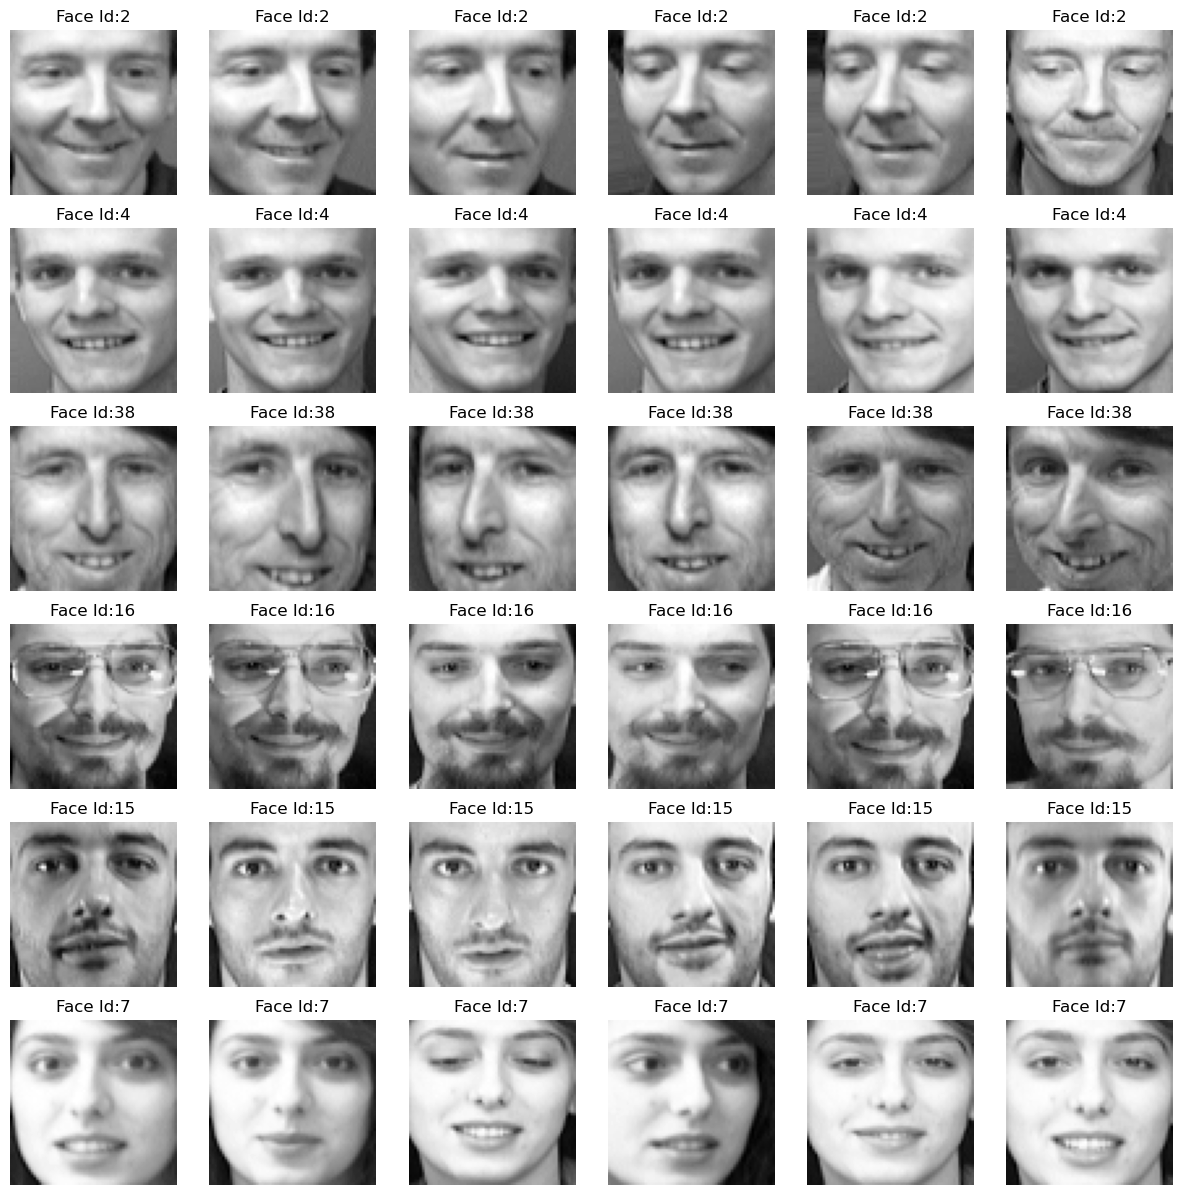

In [123]:
rows = 6
cols = 6

fig, ax=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))

# get 6 random different faces
face_id = random.sample(range(0,40), rows)
print(face_id)

'''
face_id = set(face_id)
while len(face_id) < rows:
    face_id.add(random.randint(0, 39))
face_id = sorted(face_id)
print(face_id)
'''

for i, face_id in enumerate(face_id):
    for j in range(cols):
        image_index=face_id * 10 + j
        ax[i,j].imshow(data[image_index], cmap="gray", aspect="auto")
        ax[i,j].set_title("Face Id:{}".format(face_id))
        ax[i,j].axis("off")

### Get all the target faces from the data

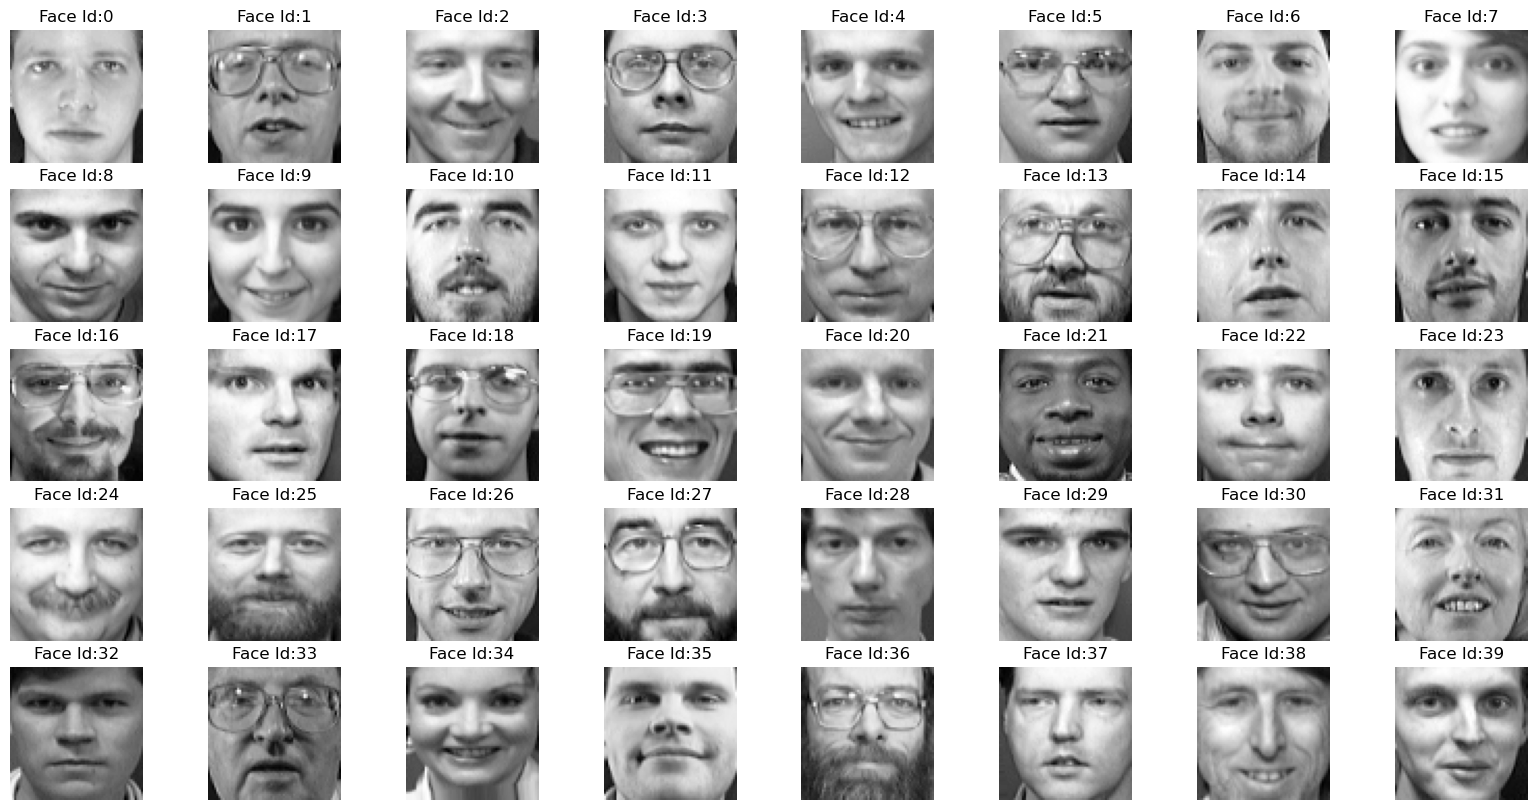

In [124]:
fig, axarr=plt.subplots(nrows=5, ncols=8, figsize=(20, 10))
axarr=axarr.flatten()

#iterating over user ids
for i in range(40):
    image_index=i * 10
    axarr[i].imshow(data[image_index], cmap="gray")
    axarr[i].set_title("Face Id:{}".format(i))
    axarr[i].axis("off")

### Get 6 random people face from the target data

[36, 10, 17, 1, 5, 35]


TypeError: Invalid shape () for image data

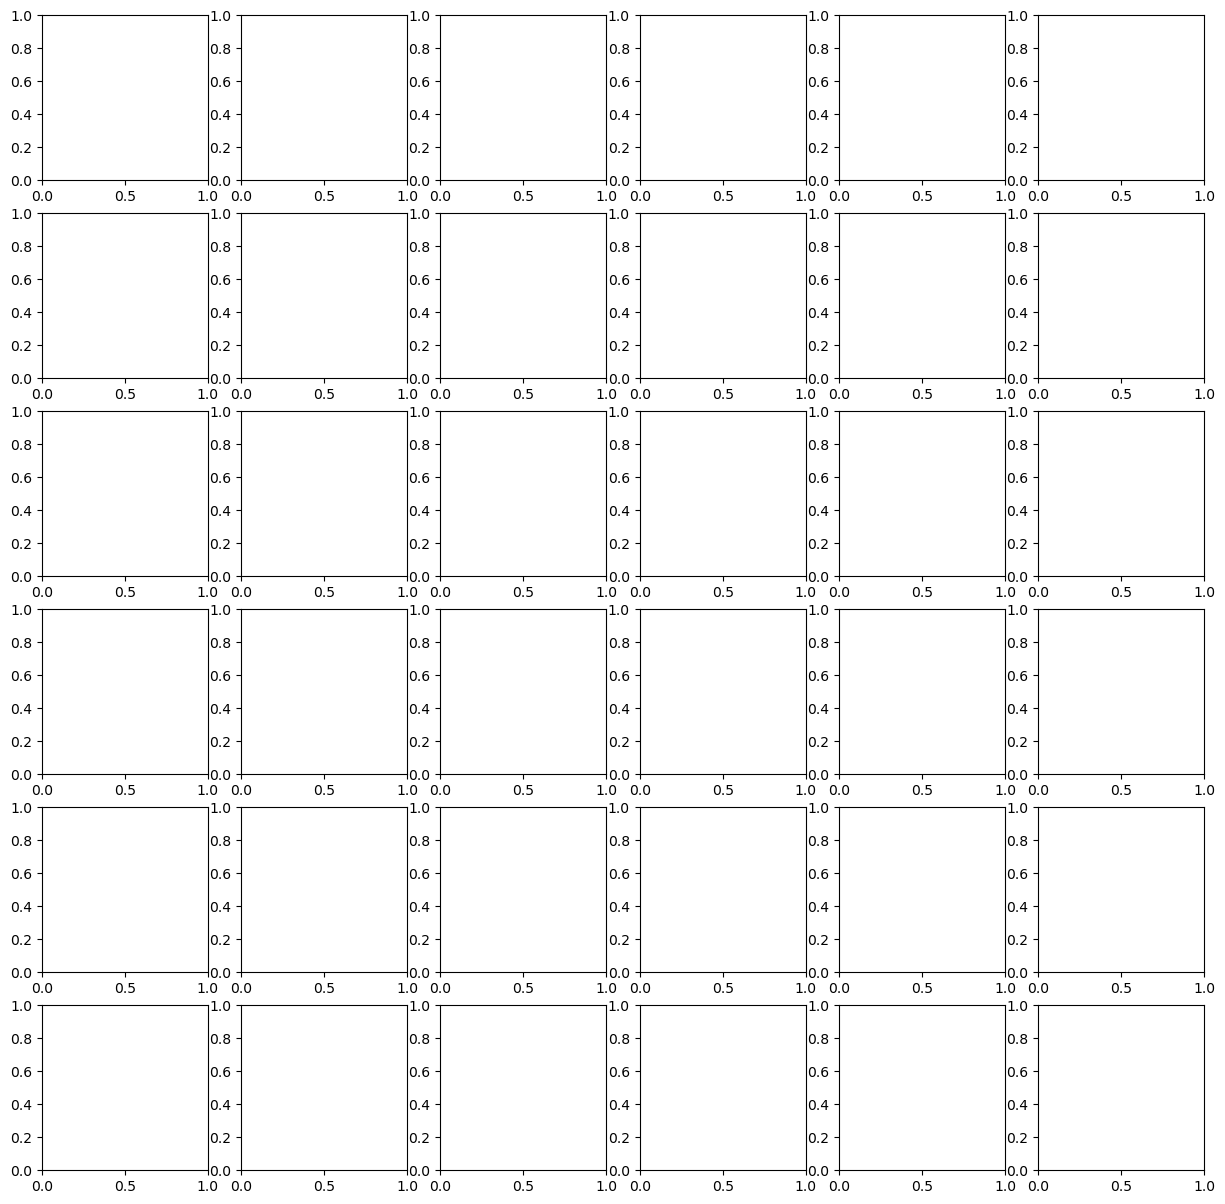

In [115]:
rows = 6
cols = 6

fig, ax=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))

face_id = random.sample(range(0,40), rows)
print(face_id)

for i, face_id in enumerate(face_id):
    for j in range(cols):
        image_index=face_id * 10 + j
        ax[i,j].imshow(target_data[image_index], cmap="gray", aspect="auto")
        ax[i,j].set_title("Face Id:{}".format(face_id))
        ax[i,j].axis("off")

In [129]:
data = data.reshape((data.shape[0], data.shape[1] * data.shape[2]))
print(f"Data shape: {data.shape}")

Data shape: (400, 4096)


### Split Data into Train and Test

In [130]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(data, target_data, test_size=0.2, stratify=target_data)

### Distribuiton of the dataset


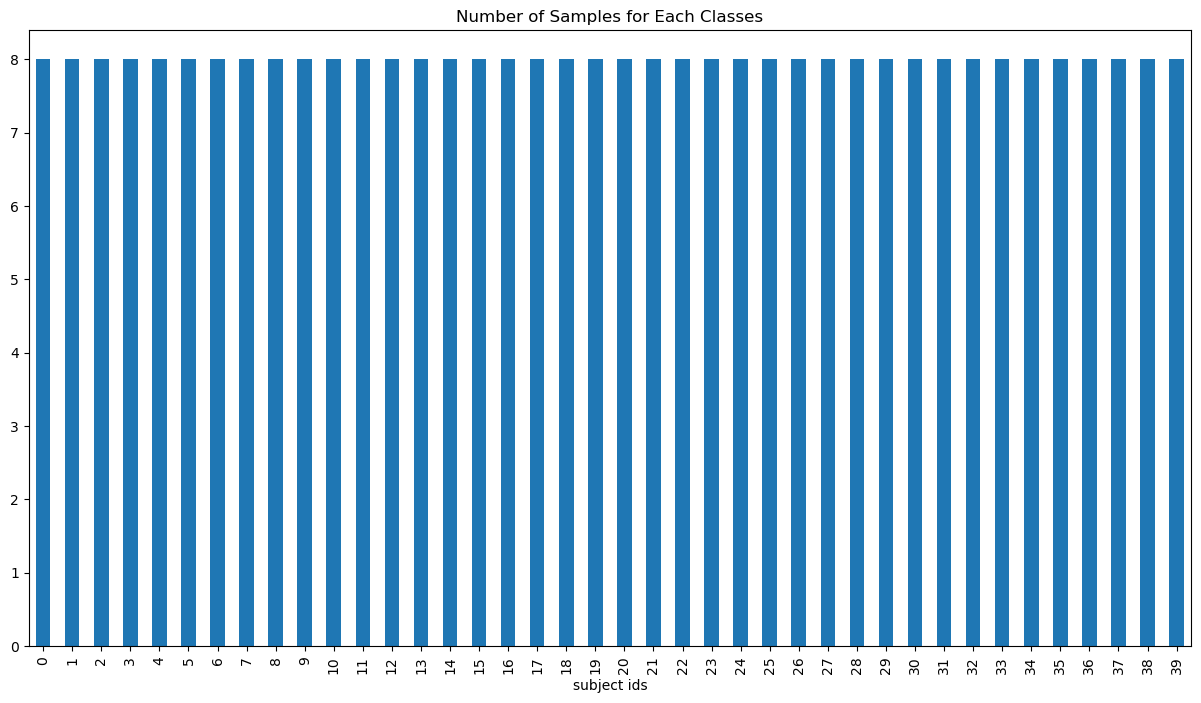

In [131]:
y_frame=pd.DataFrame()
y_frame['subject ids']= y_train
y_frame.groupby(['subject ids']).size().plot.bar(figsize=(15,8),title="Number of Samples for Each Classes")
plt.show()

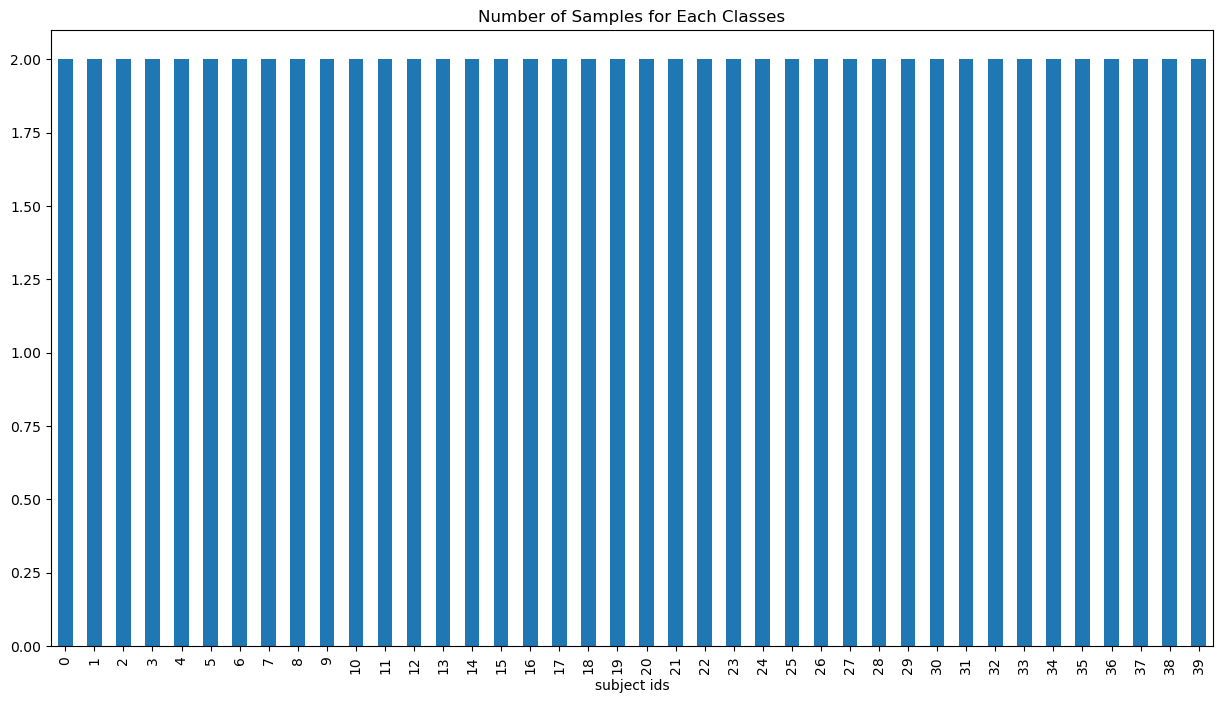

In [132]:
y_frame=pd.DataFrame()
y_frame['subject ids']= y_test
y_frame.groupby(['subject ids']).size().plot.bar(figsize=(15,8),title="Number of Samples for Each Classes")
plt.show()

# PCA

X_train_pca shape: (320, 2)
X_test_pca shape: (80, 2)


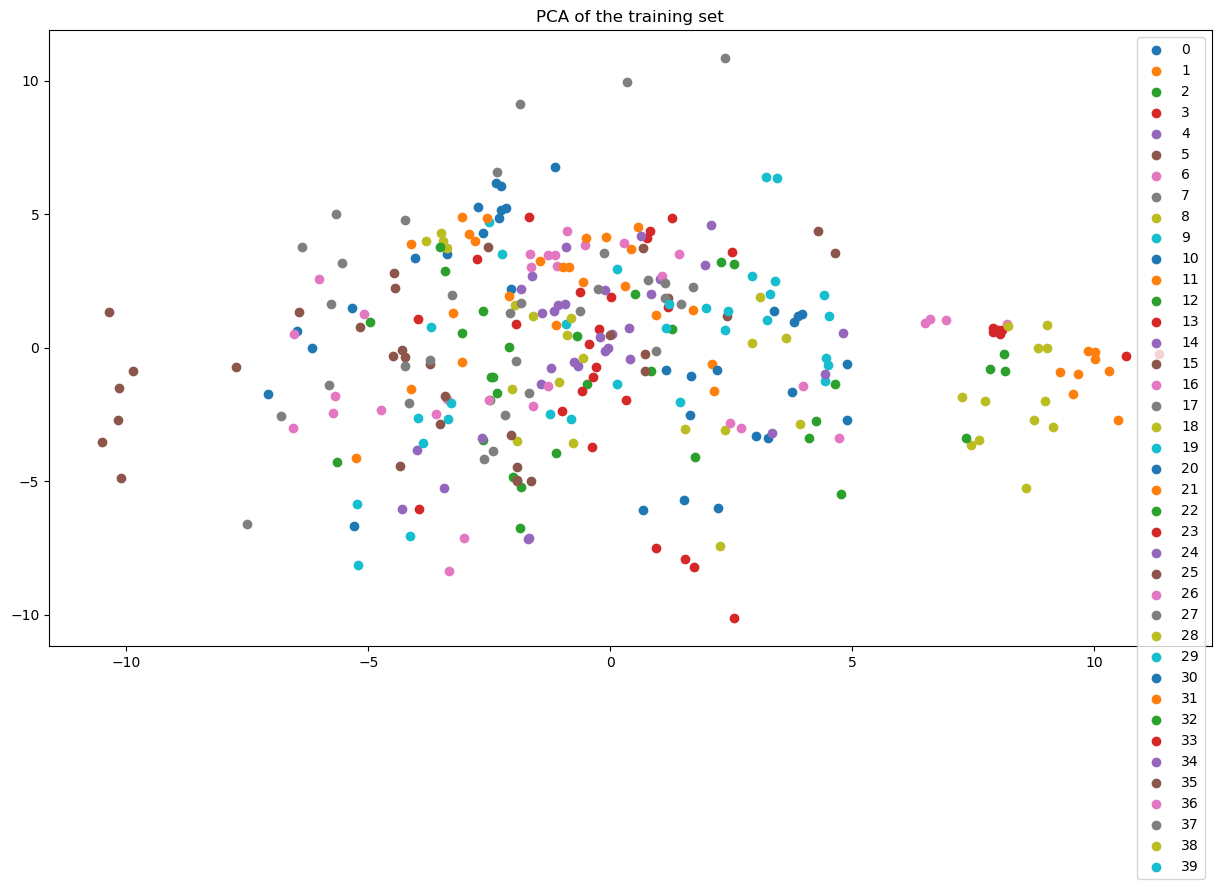

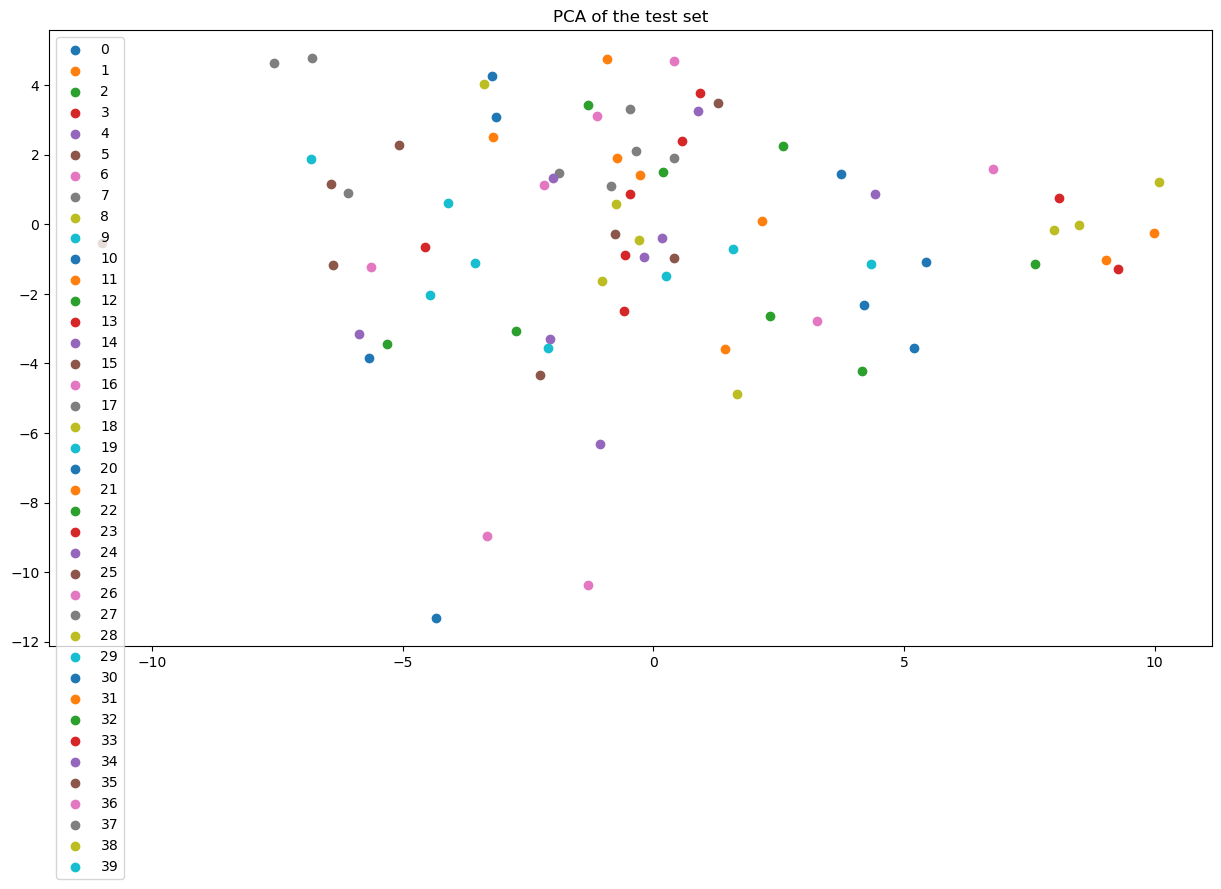

In [133]:
pca = PCA(n_components=2)
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print(f"X_train_pca shape: {X_train_pca.shape}")
print(f"X_test_pca shape: {X_test_pca.shape}")

plt.figure(figsize=(15,8))

for i in range(40):
    plt.scatter(X_train_pca[y_train == i, 0], X_train_pca[y_train == i, 1], label=i)
plt.title("PCA of the training set")
plt.legend()
plt.show()

plt.figure(figsize=(15,8))

for i in range(40):
    plt.scatter(X_test_pca[y_test == i, 0], X_test_pca[y_test == i, 1], label=i)    
plt.title("PCA of the test set")
plt.legend()
plt.show()

Show the average face

(-0.5, 63.5, 63.5, -0.5)

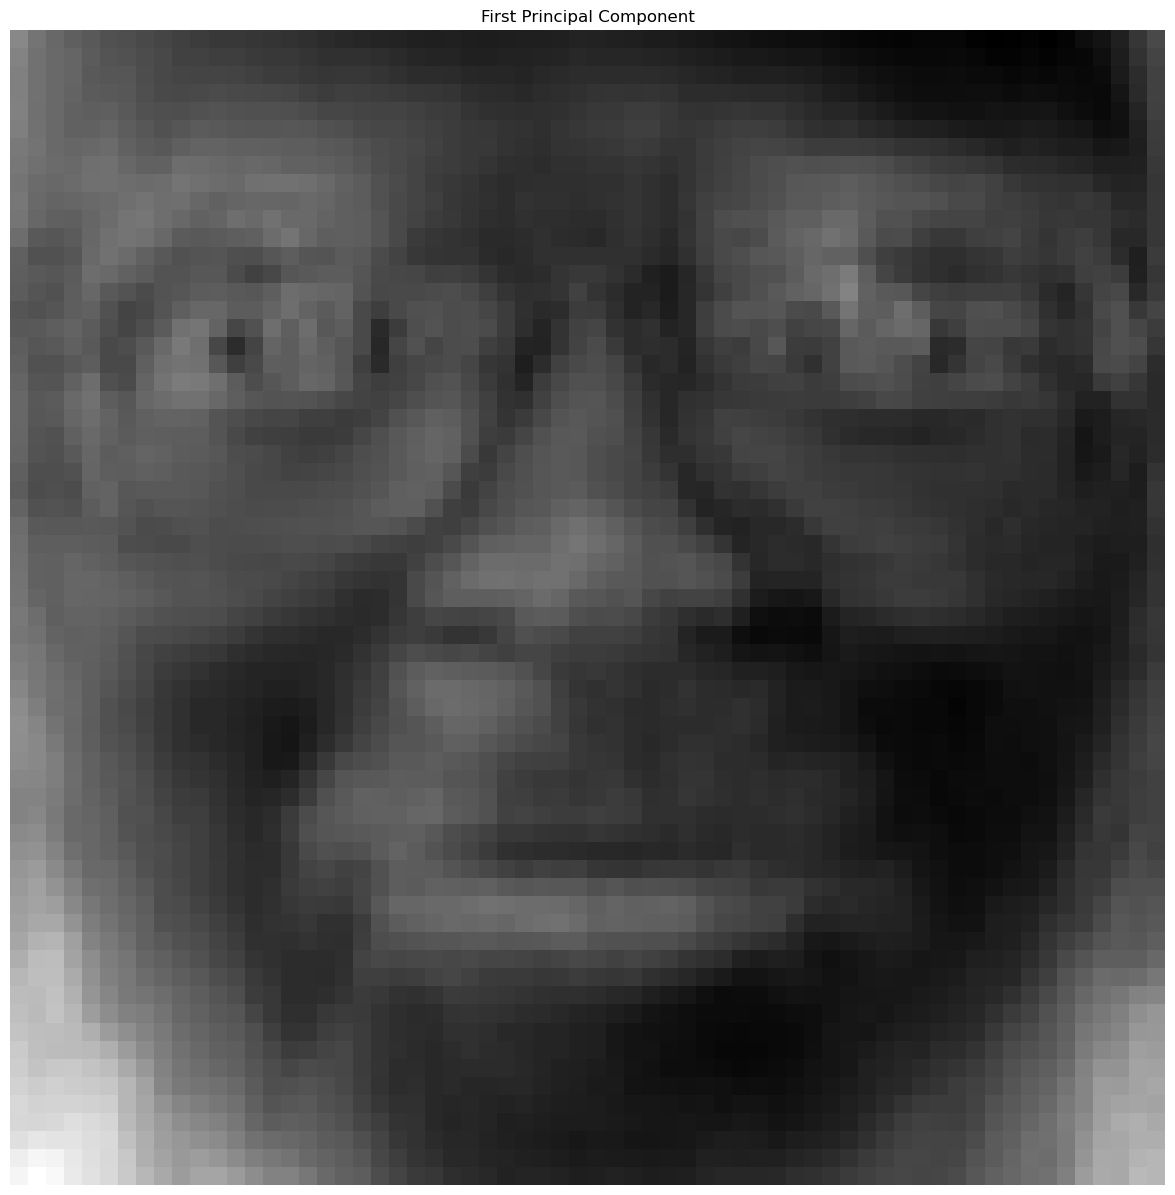

In [136]:
fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(15,15))

ax.imshow(pca.components_.reshape((2, 64, 64))[0], cmap="gray")
ax.set_title("First Principal Component")
ax.axis("off")
